In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
#from tensorflow.keras.applications import VGG16, InceptionResNetV2
#from keras import regularizers
#from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.losses import categorical_crossentropy

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(48,48,)),
    tf.keras.layers.Dense(1024, activation= 'relu'),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(256, activation= 'relu'),
    tf.keras.layers.Dense(128, activation= 'relu'),
     tf.keras.layers.Dense(64, activation= 'relu'),
     tf.keras.layers.Dense(64, activation= 'relu'),
     tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 1024)              2360320   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4

In [4]:
train_datagen = ImageDataGenerator(
     #zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255,
    rotation_range=10,
    zoom_range=0.3,
)


 

train_data = train_datagen.flow_from_directory(directory= "D:/facial_expression/train", 
                                               target_size=(48,48), 
                                               batch_size=64,
                                               color_mode="grayscale",
                                               class_mode='categorical',
                                               shuffle=True
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [5]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "D:/facial_expression/test", 
                                           target_size=(48,48), 
                                           batch_size=64,
                                           color_mode="grayscale",
        class_mode='categorical',
        shuffle=True
                                  )

Found 7178 images belonging to 7 classes.


In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [6]:
'''model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])'''
#model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
from tensorflow.keras import optimizers

opt=optimizers.Adam(0.001)
model.compile(optimizer=opt, loss= categorical_crossentropy , metrics=['accuracy']  )

In [7]:
hist = model.fit_generator(train_data, 
                           validation_data= val_data, 
                           #steps_per_epoch= 10, 
                           epochs= 100, 
                           #validation_steps= 8,
                          )

Epoch 1/100


C:\Users\BTC\AppData\Local\Temp\ipykernel_4468\724265428.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


449/449 [==============================] - 34s 73ms/step - loss: 1.8425 - accuracy: 0.2385 - val_loss: 1.8212 - val_accuracy: 0.2534
Epoch 2/100
449/449 [==============================] - 31s 70ms/step - loss: 1.7968 - accuracy: 0.2625 - val_loss: 1.7246 - val_accuracy: 0.3225
Epoch 3/100
449/449 [==============================] - 33s 73ms/step - loss: 1.7568 - accuracy: 0.2919 - val_loss: 1.7185 - val_accuracy: 0.3054
Epoch 4/100
449/449 [==============================] - 29s 65ms/step - loss: 1.7468 - accuracy: 0.2984 - val_loss: 1.6921 - val_accuracy: 0.3344
Epoch 5/100
449/449 [==============================] - 30s 67ms/step - loss: 1.7384 - accuracy: 0.3033 - val_loss: 1.6880 - val_accuracy: 0.3314
Epoch 6/100
449/449 [==============================] - 30s 67ms/step - loss: 1.7353 - accuracy: 0.3027 - val_loss: 1.6957 - val_accuracy: 0.3303
Epoch 7/100
449/449 [==============================] - 29s 65ms/step - loss: 1.7317 - accuracy: 0.3051 - val_loss: 1.6793 - val_accuracy: 0.33

449/449 [==============================] - 32s 72ms/step - loss: 1.6433 - accuracy: 0.3505 - val_loss: 1.5742 - val_accuracy: 0.3840
Epoch 51/100
449/449 [==============================] - 32s 70ms/step - loss: 1.6385 - accuracy: 0.3541 - val_loss: 1.5925 - val_accuracy: 0.3768
Epoch 52/100
449/449 [==============================] - 31s 70ms/step - loss: 1.6415 - accuracy: 0.3521 - val_loss: 1.5743 - val_accuracy: 0.3862
Epoch 53/100
449/449 [==============================] - 31s 69ms/step - loss: 1.6398 - accuracy: 0.3532 - val_loss: 1.5840 - val_accuracy: 0.3778
Epoch 54/100
449/449 [==============================] - 31s 69ms/step - loss: 1.6364 - accuracy: 0.3537 - val_loss: 1.5789 - val_accuracy: 0.3859
Epoch 55/100
449/449 [==============================] - 31s 69ms/step - loss: 1.6349 - accuracy: 0.3529 - val_loss: 1.5807 - val_accuracy: 0.3828
Epoch 56/100
449/449 [==============================] - 33s 73ms/step - loss: 1.6377 - accuracy: 0.3544 - val_loss: 1.6178 - val_accuracy

In [9]:
model.save('project_twq_edit.h5')

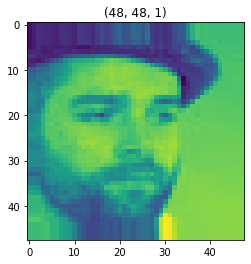

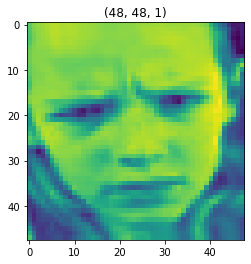

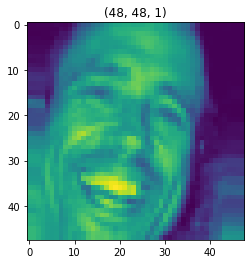

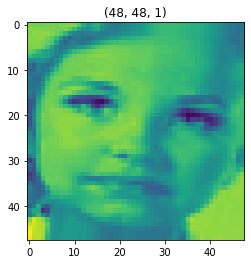

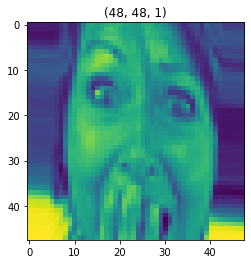

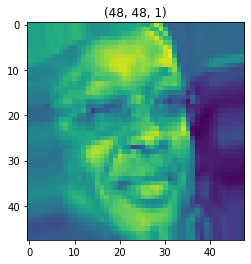

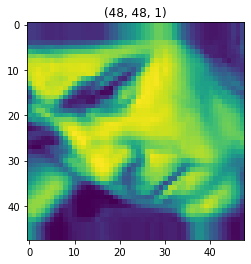

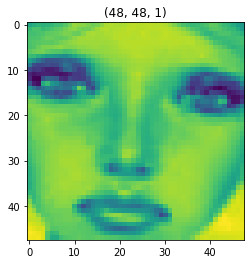

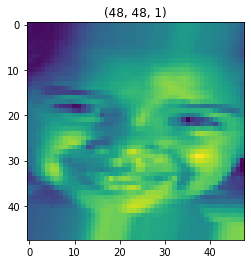

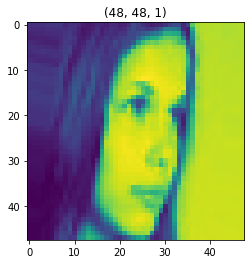

In [38]:
t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
    """
    input  :- images array 
    output :- plots the images 
    """
    count = 0
    for im, l in zip(img_arr,label) :
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis = False
        plt.show()
    
        count += 1
        if count == 10:
            break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)


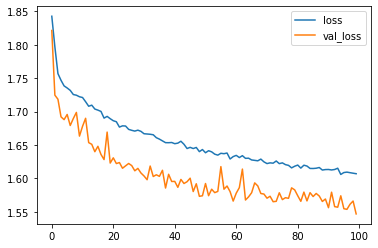

In [40]:
plt.plot(hist.history['loss'], label= 'loss')
plt.plot(hist.history['val_loss'], label= 'val_loss')
plt.legend()

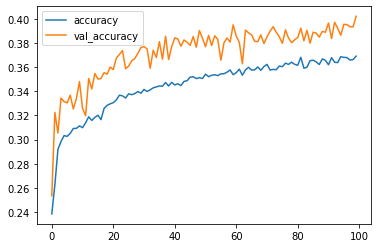

In [41]:
plt.plot(hist.history['accuracy'], label= 'accuracy')
plt.plot(hist.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [42]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 185ms/step
 the image is of sad


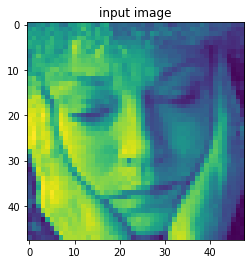

In [43]:
#"D:/facial_expression/test"
#"D:\facial_expression\test\neutral\PrivateTest_59059.jpg"
path = "D:/facial_expression/test/sad/PrivateTest_2326190.jpg"
img = load_img(path, target_size=(48,48) ,color_mode='grayscale')

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


In [27]:
#33